# Survival Analysis Lab

Complete the following exercises to solidify your knowledge of survival analysis.

In [72]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test, multivariate_logrank_test

cf.go_offline()

In [7]:
data = pd.read_csv('../data/attrition.csv')

In [9]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## 1. Generate and plot a survival function that shows how employee retention rates vary by gender and employee age.

*Tip: If your lines have gaps in them, you can fill them in by using the `fillna(method=ffill)` and the `fillna(method=bfill)` methods and then taking the average. We have provided you with a revised survival function below that you can use for the exercises in this lab*

In [43]:
def survival(data: pd.DataFrame, group_field: str, time_field: str, event_field: str):
    kmf = KaplanMeierFitter()
    results = []

    for i in data[group_field].unique():
        group = data[data[group_field]==i]
        T = group[time_field]
        E = group[event_field]
        kmf.fit(T, E, label=str(i))
        results.append(kmf.survival_function_)

    survival = pd.concat(results, axis=1)
    front_fill = survival.fillna(method='ffill')
    back_fill = survival.fillna(method='bfill')
    smoothed = (front_fill + back_fill) / 2
    smoothed = smoothed.sort_index()
    smoothed = smoothed.fillna(method='ffill')
    return smoothed

<AxesSubplot:title={'center':'Employee Retention Rates'}, xlabel='Age of employees', ylabel='Attrition Rate'>

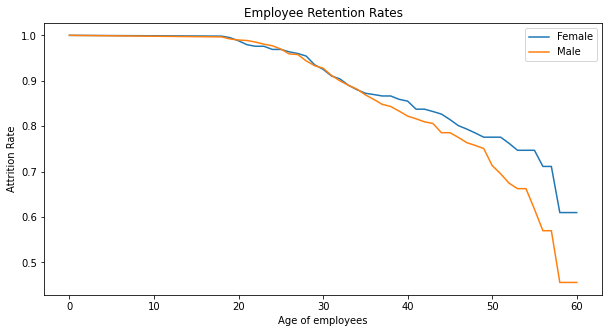

In [48]:
survival_function = survival(data, 'Gender', 'Age', 'Attrition')
# Attrition = variable de evento
# Si no se tienen años continuos se pueden usar variables del mismo tipo, en este caso: Edad (Age)

survival_function.plot(kind='line', figsize=(10,5),
           title='Employee Retention Rates',
           xlabel='Age of employees',
           ylabel='Attrition Rate')

In [49]:
survival_function
# En la edad 57 retoma el valor anterior con fillna(method='ffill')

,Female,Male
timeline,,
0.0,1.000000,1.000000
18.0,0.998299,0.996599
19.0,0.994880,0.992058
20.0,0.988019,0.989786
21.0,0.979413,0.988645
22.0,0.975964,0.985201
23.0,0.975964,0.980564
24.0,0.969018,0.977050
25.0,0.969018,0.969918


## 2. Compare the plot above with one that plots employee retention rates by gender over the number of years the employee has been working for the company.

<AxesSubplot:title={'center':'Employee Retention Rates'}, xlabel='Years of employees at the company', ylabel='Attrition Rate'>

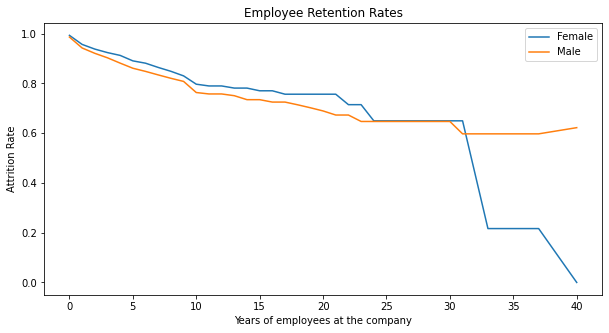

In [51]:
survival_function = survival(data, 'Gender', 'YearsAtCompany', 'Attrition')
# Attrition = variable de evento
# Si no se tienen años continuos se pueden usar variables del mismo tipo, en este caso: Edad (Age)

survival_function.plot(kind='line', figsize=(10,5),
           title='Employee Retention Rates',
           xlabel='Years of employees at the company',
           ylabel='Attrition Rate')

In [52]:
survival_function

,Female,Male
timeline,,
0.0,0.993197,0.986395
1.0,0.956797,0.942452
2.0,0.938000,0.920975
3.0,0.923879,0.902917
4.0,0.912585,0.881528
5.0,0.890624,0.861027
6.0,0.881315,0.848334
7.0,0.864235,0.834195
8.0,0.848663,0.820565


## 3. Let's look at retention rate by gender from a third perspective - the number of years since the employee's last promotion. Generate and plot a survival curve showing this.

<AxesSubplot:title={'center':'Employee Retention Rates'}, xlabel='Years since last promotion', ylabel='Attrition Rate'>

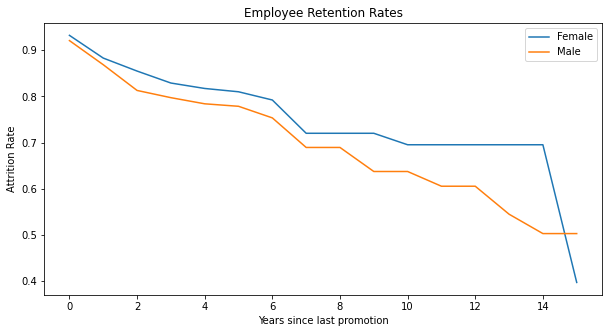

In [53]:
survival_function = survival(data, 'Gender', 'YearsSinceLastPromotion', 'Attrition')
# Attrition = variable de evento
# Si no se tienen años continuos se pueden usar variables del mismo tipo, en este caso: Edad (Age)

survival_function.plot(kind='line', figsize=(10,5),
           title='Employee Retention Rates',
           xlabel='Years since last promotion',
           ylabel='Attrition Rate')

In [54]:
survival_function

,Female,Male
timeline,,
0.0,0.931973,0.920635
1.0,0.882785,0.868425
2.0,0.854697,0.812757
3.0,0.828797,0.797127
4.0,0.817041,0.783841
5.0,0.809874,0.778473
6.0,0.792074,0.753361
7.0,0.720068,0.689396
8.0,0.720068,0.689396


## 4. Let's switch to looking at retention rates from another demographic perspective: marital status. Generate and plot survival curves for the different marital statuses by number of years at the company.

<AxesSubplot:title={'center':'Employee Retention Rates'}, xlabel='Years of employees at the company', ylabel='Attrition Rate'>

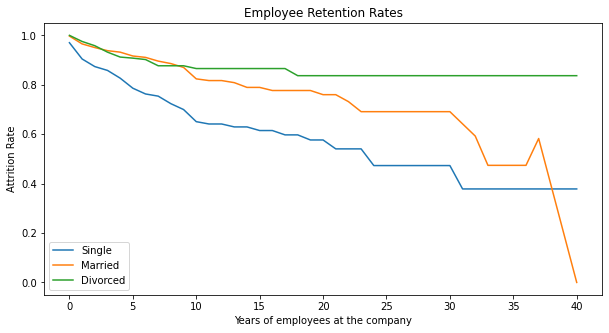

In [55]:
survival_function = survival(data, 'MaritalStatus', 'YearsAtCompany', 'Attrition')
# Attrition = variable de evento
# Si no se tienen años continuos se pueden usar variables del mismo tipo, en este caso: Edad (Age)

survival_function.plot(kind='line', figsize=(10,5),
           title='Employee Retention Rates',
           xlabel='Years of employees at the company',
           ylabel='Attrition Rate')

## 5. Let's also look at the marital status curves by employee age. Generate and plot the survival curves showing retention rates by marital status and age.

<AxesSubplot:title={'center':'Employee Retention Rates'}, xlabel='Ages of employees', ylabel='Attrition Rate'>

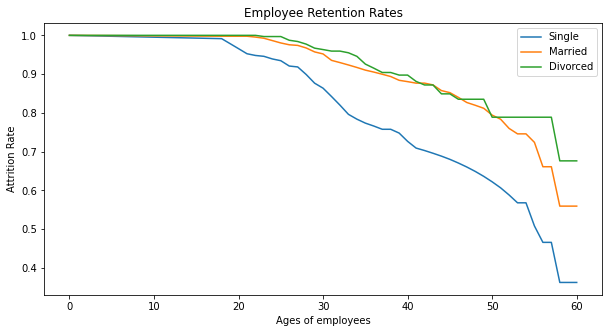

In [56]:
survival_function = survival(data, 'MaritalStatus', 'Age', 'Attrition')
# Attrition = variable de evento
# Si no se tienen años continuos se pueden usar variables del mismo tipo, en este caso: Edad (Age)

survival_function.plot(kind='line', figsize=(10,5),
           title='Employee Retention Rates',
           xlabel='Ages of employees',
           ylabel='Attrition Rate')

## 6. Now that we have looked at the retention rates by gender and marital status individually, let's look at them together. 

Create a new field in the data set that concatenates marital status and gender, and then generate and plot a survival curve that shows the retention by this new field over the age of the employee.

In [57]:
data['Gender_&_MaritalStatus'] = data['Gender'] + '_' + data['MaritalStatus']
data.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_&_MaritalStatus
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Female_Single


<AxesSubplot:title={'center':'Employee Retention Rates'}, xlabel='Ages of employees', ylabel='Attrition Rate'>

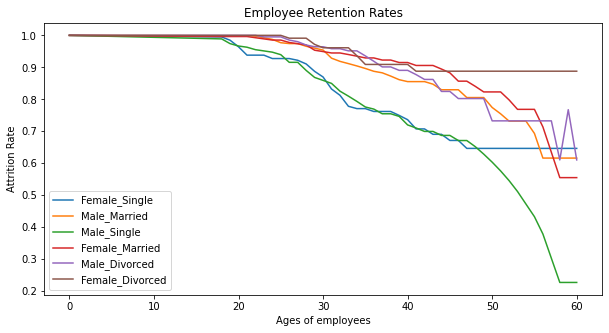

In [58]:
survival_function = survival(data, 'Gender_&_MaritalStatus', 'Age', 'Attrition')
# Attrition = variable de evento
# Si no se tienen años continuos se pueden usar variables del mismo tipo, en este caso: Edad (Age)

survival_function.plot(kind='line', figsize=(10,5),
           title='Employee Retention Rates',
           xlabel='Ages of employees',
           ylabel='Attrition Rate')

## 6. Let's find out how job satisfaction affects retention rates. Generate and plot survival curves for each level of job satisfaction by number of years at the company.

In [60]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Gender_&_MaritalStatus'],
      dtype='object')

<AxesSubplot:title={'center':'Employee Retention Rates'}, xlabel='Years of employees at the company', ylabel='Attrition Rate'>

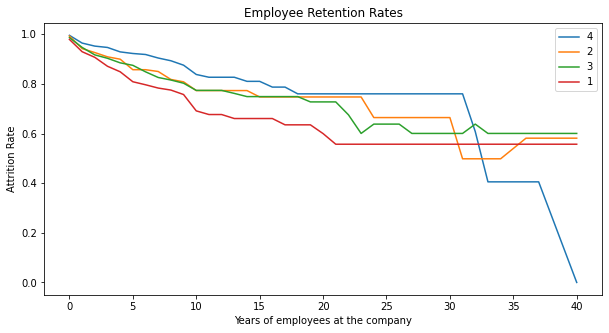

In [61]:
survival_function = survival(data, 'JobSatisfaction', 'YearsAtCompany', 'Attrition')
# Attrition = variable de evento
# Si no se tienen años continuos se pueden usar variables del mismo tipo, en este caso: Edad (Age)

survival_function.plot(kind='line', figsize=(10,5),
           title='Employee Retention Rates',
           xlabel='Years of employees at the company',
           ylabel='Attrition Rate')

## 7. Let's investigate whether the department the employee works in has an impact on how long they stay with the company. Generate and plot survival curves showing retention by department and years the employee has worked at the company.

<AxesSubplot:title={'center':'Employee Retention Rates'}, xlabel='Years of employees at the company', ylabel='Attrition Rate'>

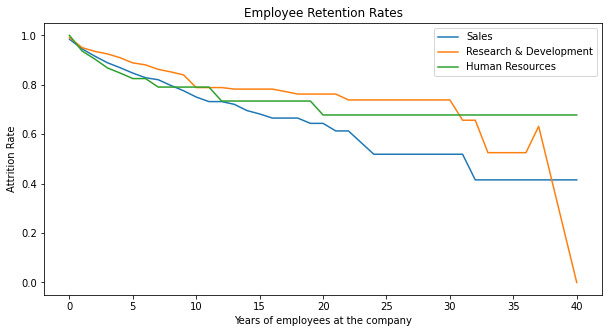

In [62]:
survival_function = survival(data, 'Department', 'YearsAtCompany', 'Attrition')
# Attrition = variable de evento
# Si no se tienen años continuos se pueden usar variables del mismo tipo, en este caso: Edad (Age)

survival_function.plot(kind='line', figsize=(10,5),
           title='Employee Retention Rates',
           xlabel='Years of employees at the company',
           ylabel='Attrition Rate')

## 8. From the previous example, it looks like the sales department has the highest attrition. Let's drill down on this and look at what the survival curves for specific job roles within that department look like.

Filter the data set for just the sales department and then generate and plot survival curves by job role and the number of years at the company.

<AxesSubplot:title={'center':'Employee Retention Rates'}, xlabel='Years of employees at the company', ylabel='Attrition Rate'>

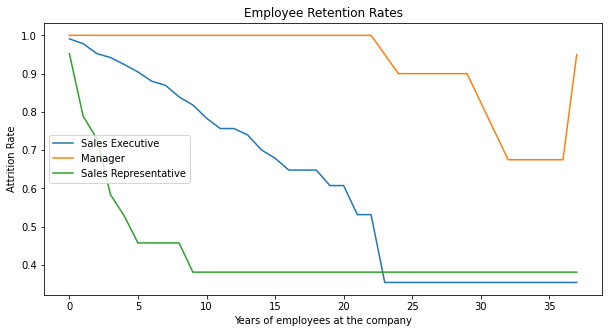

In [63]:
data_sales = data[data['Department'] == 'Sales']

survival_function = survival(data_sales, 'JobRole', 'YearsAtCompany', 'Attrition')
# Attrition = variable de evento
# Si no se tienen años continuos se pueden usar variables del mismo tipo, en este caso: Edad (Age)

survival_function.plot(kind='line', figsize=(10,5),
           title='Employee Retention Rates',
           xlabel='Years of employees at the company',
           ylabel='Attrition Rate')

## 9. Let examine how compensation affects attrition.

- Use the `pd.qcut` method to bin the HourlyRate field into 5 different pay grade categories (Very Low, Low, Moderate, High, and Very High).
- Generate and plot survival curves showing employee retention by pay grade and age.

In [64]:
data.HourlyRate.unique()

array([ 94,  61,  92,  56,  40,  79,  81,  67,  44,  84,  49,  31,  93,
        50,  51,  80,  96,  78,  45,  82,  53,  83,  58,  72,  48,  42,
        41,  86,  97,  75,  33,  37,  73,  98,  36,  47,  71,  30,  43,
        99,  59,  95,  57,  76,  87,  66,  55,  32,  52,  70,  62,  64,
        63,  60, 100,  46,  39,  77,  35,  91,  54,  34,  90,  65,  88,
        85,  89,  68,  69,  74,  38], dtype=int64)

In [66]:
data['HourlyRateGrade'] = pd.qcut(data['HourlyRate'], q= 5,
                                                labels=['Very Low', 
                                                'Low', 
                                                'Moderate', 
                                                'High', 
                                                'Very High'])

data[['HourlyRate','HourlyRateGrade']].head(10)

,HourlyRate,HourlyRateGrade
0,94,Very High
1,61,Moderate
2,92,Very High
3,56,Low
4,40,Very Low
5,79,High
6,81,High
7,67,Moderate
8,44,Very Low
9,94,Very High


<AxesSubplot:title={'center':'Employee Retention Rates'}, xlabel='Ages of employees', ylabel='Attrition Rate'>

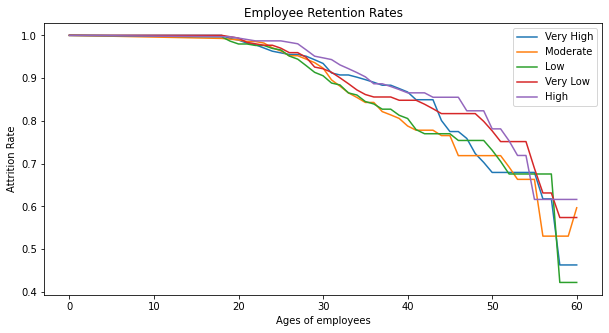

In [67]:
survival_function = survival(data, 'HourlyRateGrade', 'Age', 'Attrition')
# Attrition = variable de evento
# Si no se tienen años continuos se pueden usar variables del mismo tipo, en este caso: Edad (Age)

survival_function.plot(kind='line', figsize=(10,5),
           title='Employee Retention Rates',
           xlabel='Ages of employees',
           ylabel='Attrition Rate')

## 10. Finally, let's take a look at how the demands of the job impact employee attrition.

- Create a new field whose values are 'Overtime' or 'Regular Hours' depending on whether there is a Yes or a No in the OverTime field.
- Create a new field that concatenates that field with the BusinessTravel field.
- Generate and plot survival curves showing employee retention based on these conditions and employee age.

In [70]:
data.columns.sort_values()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'Gender_&_MaritalStatus', 'HourlyRate', 'HourlyRateGrade',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [69]:
data.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [73]:
data['OverTimeEmployee'] = np.where(data['OverTime'] == 'Yes', 'OverTime', 'Regular Hours')
data['OTE_BusinessTravel'] = data['OverTimeEmployee'] + '_' + data['BusinessTravel']
data[['OverTime','BusinessTravel','OverTimeEmployee','OTE_BusinessTravel']].head(10)

,OverTime,BusinessTravel,OverTimeEmployee,OTE_BusinessTravel
0,Yes,Travel_Rarely,OverTime,OverTime_Travel_Rarely
1,No,Travel_Frequently,Regular Hours,Regular Hours_Travel_Frequently
2,Yes,Travel_Rarely,OverTime,OverTime_Travel_Rarely
3,Yes,Travel_Frequently,OverTime,OverTime_Travel_Frequently
4,No,Travel_Rarely,Regular Hours,Regular Hours_Travel_Rarely
5,No,Travel_Frequently,Regular Hours,Regular Hours_Travel_Frequently
6,Yes,Travel_Rarely,OverTime,OverTime_Travel_Rarely
7,No,Travel_Rarely,Regular Hours,Regular Hours_Travel_Rarely
8,No,Travel_Frequently,Regular Hours,Regular Hours_Travel_Frequently
9,No,Travel_Rarely,Regular Hours,Regular Hours_Travel_Rarely


<AxesSubplot:title={'center':'Employee Retention Rates'}, xlabel='Ages of employees', ylabel='Attrition Rate'>

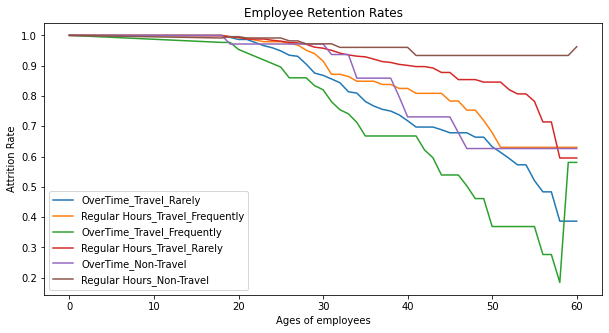

In [74]:
survival_function = survival(data, 'OTE_BusinessTravel', 'Age', 'Attrition')
# Attrition = variable de evento
# Si no se tienen años continuos se pueden usar variables del mismo tipo, en este caso: Edad (Age)

survival_function.plot(kind='line', figsize=(10,5),
           title='Employee Retention Rates',
           xlabel='Ages of employees',
           ylabel='Attrition Rate')

In [75]:
survival_function

,OverTime_Travel_Rarely,Regular Hours_Travel_Frequently,OverTime_Travel_Frequently,Regular Hours_Travel_Rarely,OverTime_Non-Travel,Regular Hours_Non-Travel
timeline,,,,,,
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
18.0,1.000000,1.000000,0.976744,0.998663,1.000000,0.991304
19.0,0.993220,0.994764,0.976744,0.995986,0.971429,0.995652
20.0,0.986417,0.992147,0.953488,0.993301,0.971429,0.995652
21.0,0.986417,0.989529,0.941860,0.987895,0.971429,0.991304
22.0,0.976142,0.984293,0.930233,0.987895,0.971429,0.991304
23.0,0.965831,0.979058,0.918605,0.987895,0.971429,0.991304
24.0,0.958957,0.979058,0.906977,0.983715,0.971429,0.991304
25.0,0.948533,0.979058,0.895198,0.980893,0.971429,0.991304
